In [1]:
# installing the Kaggle library
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 807M/812M [00:06<00:00, 101MB/s] 
100% 812M/812M [00:06<00:00, 128MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [8]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.2181.jpg', 'cat.11936.jpg', 'dog.3605.jpg', 'cat.5154.jpg', 'dog.5923.jpg', 'dog.7159.jpg', 'cat.6320.jpg', 'cat.7128.jpg', 'cat.8677.jpg', 'dog.12322.jpg', 'cat.1362.jpg', 'cat.4658.jpg', 'dog.11182.jpg', 'cat.11473.jpg', 'cat.4900.jpg', 'dog.3135.jpg', 'dog.11434.jpg', 'cat.11998.jpg', 'cat.4153.jpg', 'cat.6794.jpg', 'cat.1032.jpg', 'dog.5491.jpg', 'cat.1808.jpg', 'cat.4907.jpg', 'dog.6242.jpg', 'cat.11604.jpg', 'cat.4512.jpg', 'cat.9455.jpg', 'dog.1018.jpg', 'dog.11753.jpg', 'cat.1022.jpg', 'cat.8311.jpg', 'cat.2453.jpg', 'cat.8770.jpg', 'dog.1156.jpg', 'cat.8395.jpg', 'cat.8949.jpg', 'dog.1323.jpg', 'cat.3695.jpg', 'dog.9667.jpg', 'dog.8768.jpg', 'dog.6894.jpg', 'cat.3823.jpg', 'cat.8117.jpg', 'cat.470.jpg', 'cat.240.jpg', 'cat.4796.jpg', 'dog.7815.jpg', 'dog.7000.jpg', 'dog.1263.jpg', 'cat.2067.jpg', 'dog.1992.jpg', 'cat.7894.jpg', 'cat.10617.jpg', 'dog.8200.jpg', 'cat.10164.jpg', 'dog.4965.jpg', 'cat.5305.jpg', 'cat.5243.jpg', 'dog.1076.jpg', 'cat.4426.jpg', 'cat.11881.jpg'

#Importing Dependencies

In [19]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

##Displaying the images of dogs and cats

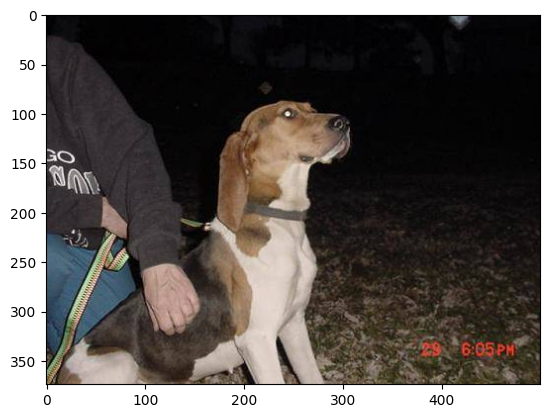

In [20]:
# display dog image
img = mpimg.imread('/content/train/dog.2181.jpg')
imgplt = plt.imshow(img)
plt.show()

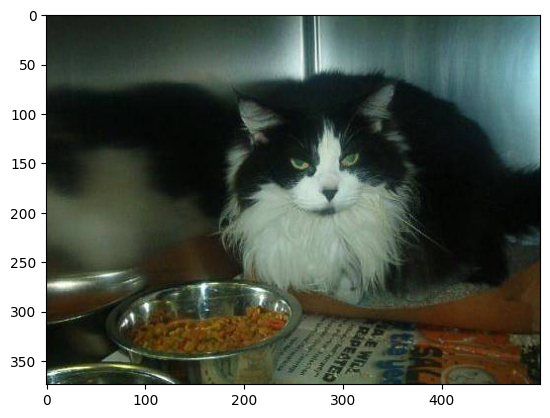

In [21]:
# display cat image
img = mpimg.imread('/content/train/cat.11936.jpg')
imgplt = plt.imshow(img)
plt.show()

In [22]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



dog
cat
dog
cat
dog


In [23]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


##Resizing all the images

In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [16]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

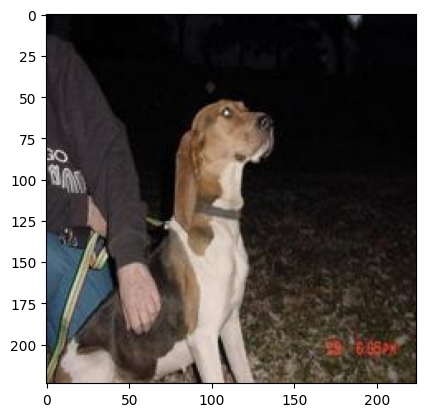

In [26]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.2181.jpg')
imgplt = plt.imshow(img)
plt.show()

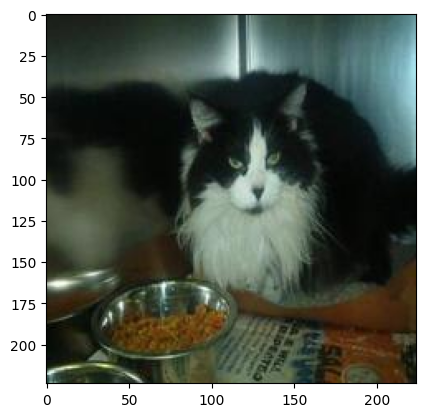

In [27]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.11936.jpg')
imgplt = plt.imshow(img)
plt.show()

#**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [29]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [30]:
print(filenames[0:5])
print(len(filenames))

['dog.2181.jpg', 'cat.11936.jpg', 'dog.3605.jpg', 'cat.5154.jpg', 'dog.5923.jpg']
2000


In [31]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 0, 1]
2000


In [32]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 994 1006]


#Converting all the resized images to numpy arrays

In [33]:
import cv2
import glob

In [35]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

# print(files)

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [36]:
print(dog_cat_images)

[[[[  6   4   4]
   [  5   3   3]
   [  5   3   3]
   ...
   [  7   5   5]
   [  7   5   5]
   [  7   5   5]]

  [[  7   5   5]
   [  5   3   3]
   [  5   3   3]
   ...
   [  7   5   5]
   [  7   5   5]
   [  7   5   5]]

  [[  8   6   6]
   [  6   4   4]
   [  5   3   3]
   ...
   [  8   6   6]
   [  8   6   6]
   [  8   6   6]]

  ...

  [[ 47  91  98]
   [ 92 131 139]
   [ 68  98 109]
   ...
   [ 42  64  75]
   [ 39  64  74]
   [ 22  47  57]]

  [[ 53  97 104]
   [ 91 130 138]
   [ 39  67  78]
   ...
   [ 32  57  67]
   [ 31  56  66]
   [ 16  41  51]]

  [[ 63 107 114]
   [ 77 116 124]
   [ 31  57  71]
   ...
   [ 25  50  60]
   [ 25  50  60]
   [ 12  37  47]]]


 [[[ 24  30  25]
   [ 24  30  25]
   [ 24  30  25]
   ...
   [147 142  97]
   [152 148 100]
   [156 152 104]]

  [[ 24  30  25]
   [ 24  30  25]
   [ 24  30  25]
   ...
   [147 142  97]
   [153 149 101]
   [156 152 104]]

  [[ 25  31  26]
   [ 25  31  26]
   [ 25  31  26]
   ...
   [148 144  96]
   [153 149 101]
   [158 154

In [37]:
type(dog_cat_images)

numpy.ndarray

In [38]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [39]:
X = dog_cat_images
Y = np.asarray(labels)

#Train Test Split

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [42]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [43]:
print(X_train_scaled)

[[[[0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]]

  [[0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]]

  [[0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]]

  ...

  [[0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]]

  [[0.00392157 0.00392157 0.00392157]
   [0.0

#**Building the Neural Networks**

In [44]:
import tensorflow as tf
import tensorflow_hub as hub

In [45]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [46]:
num_of_classes = 2

model = tf.keras.Sequential([
            pretrained_model,
            tf.keras.layers.Dense(num_of_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [47]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [49]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 107s 2s/step - loss: 0.0240 - acc: 0.9969
Epoch 2/5
50/50 [==============================] - 78s 2s/step - loss: 0.0203 - acc: 0.9981
Epoch 3/5
50/50 [==============================] - 76s 2s/step - loss: 0.0181 - acc: 0.9975
Epoch 4/5
50/50 [==============================] - 81s 2s/step - loss: 0.0162 - acc: 0.9987
Epoch 5/5
50/50 [==============================] - 71s 1s/step - loss: 0.0145 - acc: 0.9994


In [50]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 16s 1s/step - loss: 0.0601 - acc: 0.9775
Test Loss = 0.06005441024899483
Test Accuracy = 0.9775000214576721


Path of the image to be predicted: /content/cat.jpg


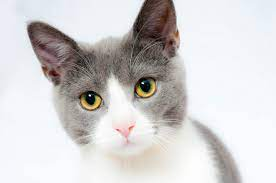

1/1 [==============================] - 1s 1s/step
[[ 4.5995398 -6.911892 ]]
0
The image represents a Cat


In [51]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/dog.jpg


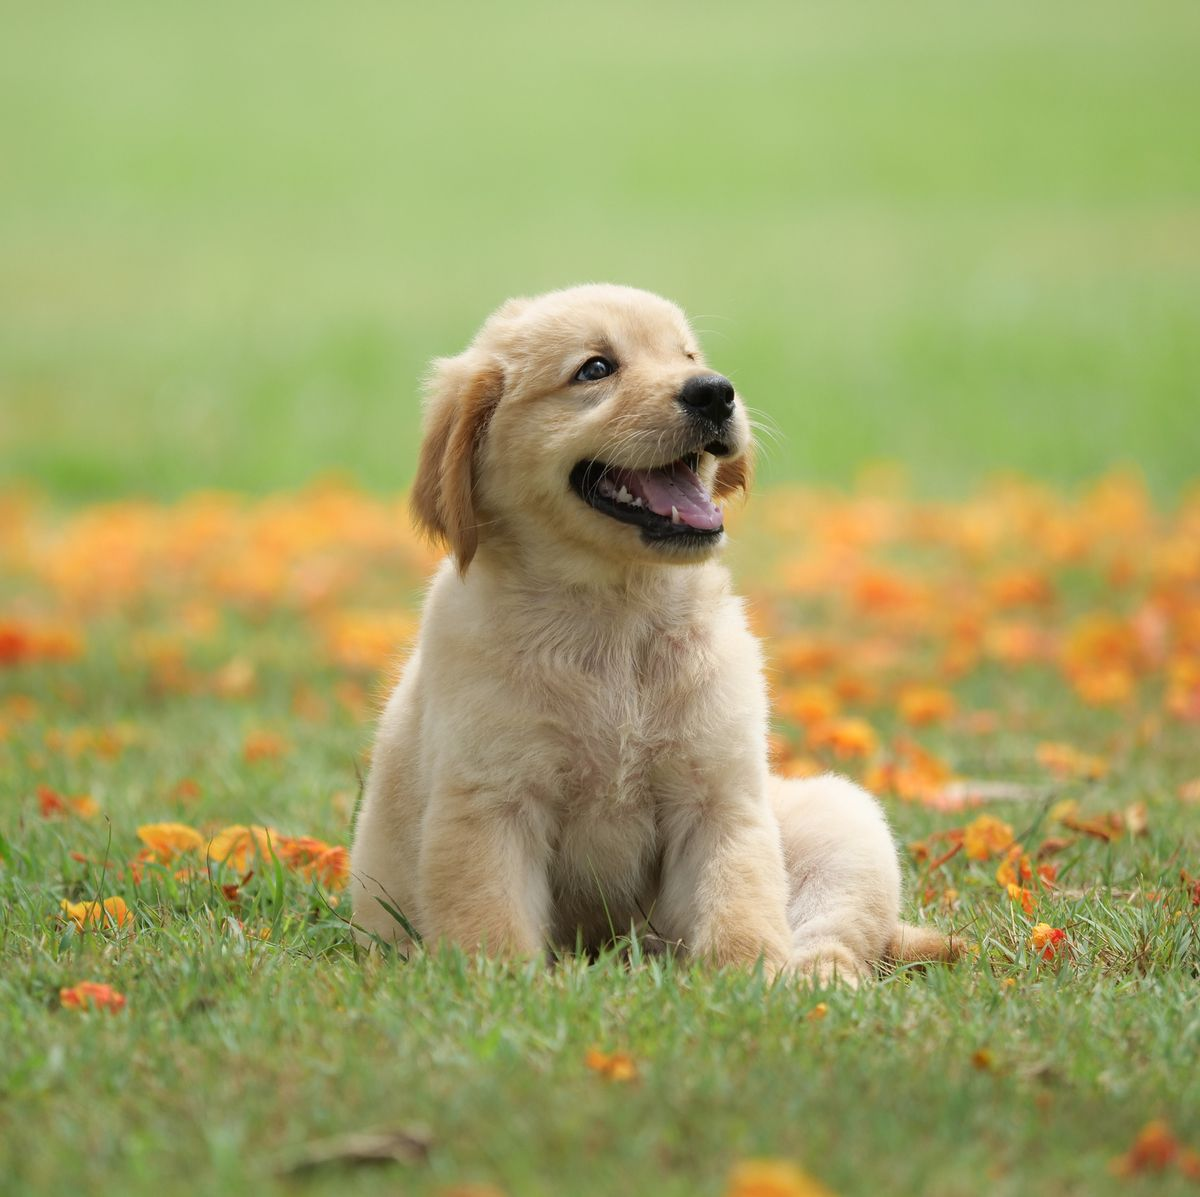

1/1 [==============================] - 0s 144ms/step
[[-6.3253775  4.0085855]]
1
The image represents a Dog


In [52]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')